In [1]:
'''
Entry for the House Price - Advanced Regression Techniques Competition
This machine learning algorithm will be trained on the Ames housing dataset to predict house prices.
Bilal Kudaimi
February 26, 2023
'''

#Importing the necessary libraries
import numpy as np
from numpy import ndarray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import csv
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data and concatenating into the same dataset. Concatenation will allow the data to be cleaned quicker.
train_df = pd.read_csv('C:/Users/PS3ma/Documents/GitHub/Project-Portfolio/Model_PredictingHousePrices/train.csv')
test_df = pd.read_csv('C:/Users/PS3ma/Documents/GitHub/Project-Portfolio/Model_PredictingHousePrices/test.csv')
data = pd.concat([train_df, test_df])

In [3]:
#First, some exploratory data analysis will be conducted to gain insight into the dataset.

#Viewing the first 5 rows of the full dataset.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
#Describing the numerical data.
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
#Viewing the data shape
data.shape

(2919, 81)

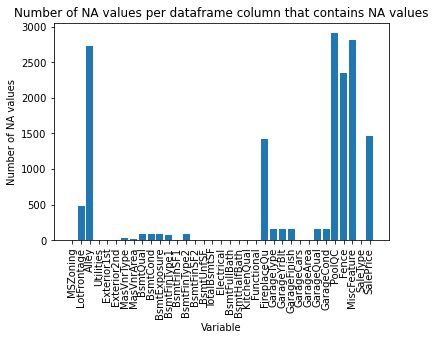

In [6]:
#How many null values are there and in which columns?
null_values = data.isnull().sum()[data.isnull().sum() > 0]

#Visualizing the columns with null values.
plt.bar(null_values.index, null_values)
plt.xlabel('Variable')
plt.ylabel('Number of NA values')
plt.title('Number of NA values per dataframe column that contains NA values')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

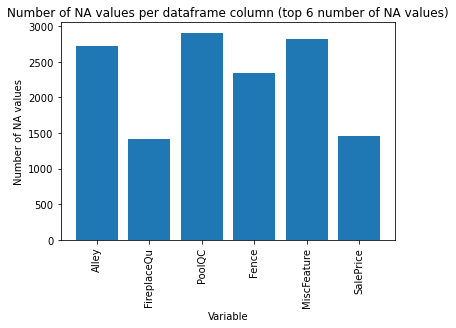

In [7]:
'''
I noticed some variables have a significant number of null values. I will remove the variables with more than 
1400 NA values (roughly half the number of rows) as they contain too many NA values to be useful.
'''

#Showing the variables with more than 1000 NA values.
null_values_above_1000 = null_values[null_values > 1400]
plt.bar(null_values_above_1000.index, null_values_above_1000)
plt.xlabel('Variable')
plt.ylabel('Number of NA values')
plt.title('Number of NA values per dataframe column (top {} number of NA values)'.format(len(null_values_above_1000)))
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

#Dropping the variables.
data = data.dropna(axis = 1, thresh = 1000)

In [8]:
#Viewing the new dataframe.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


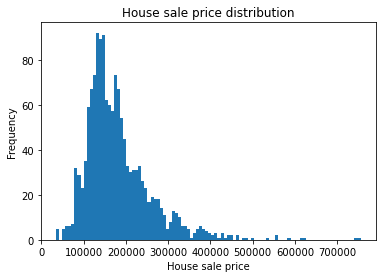

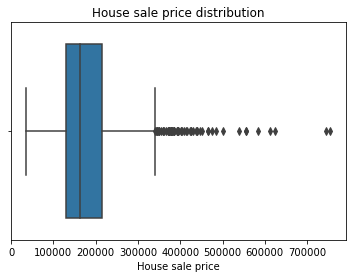

In [9]:
#The SalePrice variable will be the output variable, so I will view its distribution

plt.hist(data['SalePrice'], bins = 100)
plt.xlabel('House sale price')
plt.ylabel('Frequency')
plt.title('House sale price distribution')
plt.show()
sns.boxplot(data['SalePrice'])
plt.xlabel('House sale price')
plt.title('House sale price distribution')
plt.show()


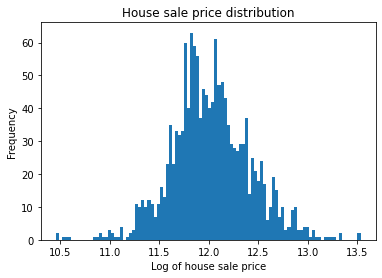

In [10]:
'''
We can see there is a skewness to the output variable's distribution, so 
I will attempt to normalize it by taking the logarithm of the variable.
'''

#Viewing the new distribution of the output variable.
data['SalePrice'] = np.log1p(data['SalePrice'])
plt.hist(data['SalePrice'], bins = 100)
plt.xlabel('Log of house sale price')
plt.ylabel('Frequency')
plt.title('House sale price distribution')
plt.show()

In [11]:
#I will also remove the ID column as it has no use for training the model.
data.drop(['Id'], axis = 1, inplace = True)

In [12]:
#Converting categorical variables to numerical variables using get_dummies
data = pd.get_dummies(data)

In [13]:
#I will drop any features highly correlated to each other, as such features offer redundant information.

corr_df = pd.DataFrame(data.corr())
row_names = corr_df.index
col_names = corr_df.columns
row_len = range(len(row_names))
col_len = range(len(col_names))

#Constructing a list of features to drop by seeing if the feature is correlated with another feature.
dropped_features = []
for i in row_names:
    for j in col_names:
        if (corr_df.loc[i])[j] > 0.75 and (corr_df.loc[i])[j] != 1:
            dropped_features.append(i)
    
print('Features to drop: ')
dropped_features

Features to drop: 


['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'MSZoning_FV',
 'Neighborhood_NPkVill',
 'Neighborhood_Somerst',
 'BldgType_Duplex',
 'HouseStyle_2Story',
 'RoofStyle_Flat',
 'RoofMatl_Tar&Grv',
 'Exterior1st_AsbShng',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsbShng',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'SaleType_New',
 'SaleCondition_Partial']

In [14]:
#With the data cleaned, I can separate the training and testing datasets again
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]

#Dropping SalePrice from the test dataframe since it's all NaN values (makes sense, as the test dataframe shouldn't 
#have what we're testing for inside it)
test.drop(['SalePrice'], axis = 1, inplace = True)

In [20]:
'''
With the output variable normalized, I can remove outlier data from the data frame.
I will determine what data points are outliers by using the 68-95-99.7 rule, which states 95% of data
in a normal distribution will be within 2 standard deviations from the mean. Therefore, I will consider a data point 
an outlier if it is more than 2 standard deviations from the mean (this should account for only 5% of the data).
'''

#Function to get the outliers from a column
def get_outliers(column, percents):
    Q1, Q3 = np.percentile(column, percents)
    IQR = Q3 - Q1
    upper_bound = Q3 + (IQR * 1.5)
    lower_bound = Q1 - (IQR * 1.5)
    outliers = np.where((column > upper_bound) | (column < lower_bound))
    return outliers

#for columns in train:
#    outliers = np.ndarray.tolist([0]) #outliers_iqr() returns an array
#    trainWithoutOutliers = train.drop(outliers)

for columns in train:
    print(get_outliers(train[columns], [5, 95]))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([  53,  249,  271,  313,  335,  384,  451,  457,  523,  661,  706,
        769,  848, 1298, 1396], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([1298], dtype=int64),)
(array([ 153,  271,  322,  470,  542,  764,  854,  924, 1253, 1458],
      dtype=int64),)
(array([], dtype=int64),)
(array([1298], dtype=int64),)
(array([1298], dtype=int64),)
(array([], dtype=int64),)
(array([  51,   88,  125,  170,  185,  187,  197,  198,  263,  267,  406,
        589,  635,  729,  829,  831,  868,  873,  883,  945, 1009, 1031,
       1173, 1349, 1364, 1440], dtype=int64),)
(array([1298], dtype=int64),)
(array([738], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([635], dtype=int64),)
(array([   8,    9,   17,   39,   48,   74,   78,   93,  102,  137,  144,
        165,  188,  246,  330, 

(array([  30,  106,  154,  187,  329,  352,  365,  383,  450,  456,  482,
        488,  502,  531,  596,  669,  676,  677,  856,  998, 1000, 1022,
       1059, 1125, 1186, 1192, 1235, 1248, 1275, 1321, 1332, 1343, 1380,
       1397, 1432], dtype=int64),)
(array([  42,  209,  269,  740,  842,  883, 1281, 1312, 1423], dtype=int64),)
(array([ 246,  398,  514,  630,  651,  809, 1443], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([  41,   97,  121,  171,  418,  425,  438,  442,  589,  601,  638,
        651,  657,  716,  814,  840,  841,  868,  943,  991,  998, 1009,
       1072, 1192, 1248, 1301, 1384, 1434, 1443, 1446], dtype=int64),)
(array([], dtype=int64),)
(array([  19,   83,   98,  109,  113,  166,  173,  202,  225,  410,  430,
        445,  456,  505,  516,  537,  550,  557,  575,  599,  701,  728,
        771,  773,  813,  836,  939,  944,  984,  996, 1017, 1024, 1055,
       1080, 1099, 1122, 1140, 1233, 1264, 1279, 1413, 1418, 1435],
      dtype=int64